<a href="https://colab.research.google.com/github/Deepak141/Internship/blob/master/Attendance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading Necessary Libraries for Face Recognition

In [4]:
!pip install face-recognition
!pip install cmake
!pip install dlib

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=76b9e740e2113c76d5ba1e2e751d3fe7f63d10494c9fb82272ffadd2a09c33c4
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Necessary Lib For Face Recognition

In [5]:
import cv2
import face_recognition
from google.colab.patches import cv2_imshow
from google.colab import files


Method to check wheter two images matches or not

In [70]:
def Attendance(selfie,passport):
  pim=cv2.cvtColor(passport,cv2.COLOR_BGR2RGB)
  im=cv2.cvtColor(selfie,cv2.COLOR_BGR2RGB)

  loc=face_recognition.face_locations(selfie)[0]

  pass_enc=face_recognition.face_encodings(pim)[0]
  selfie_enc=face_recognition.face_encodings(im)[0]

  compare=face_recognition.compare_faces([pass_enc],selfie_enc,tolerance=0.45)
  dis=face_recognition.face_distance([pass_enc],selfie_enc)[0]

  cv2.rectangle(selfie,(loc[3],loc[0]),(loc[1],loc[2]),(255,0,0),2)
  cv2_imshow(passport)
  cv2_imshow(selfie)
  
  if compare[0]==True:
    return 'Match',(1-dis)
  else:
    return 'No Match',(1-dis)

Adding Selfie and Passport Images Using Image Path

In [71]:
img=cv2.imread("/content/drive/My Drive/Internship/data/trainset/0013/0013_0001701/0000000.jpg")
selfie=img
pimg=cv2.imread("/content/drive/My Drive/Internship/data/trainset/0013/0013_0001701/0013_0001701_script.jpg")
Passport=pimg


Verifying the Image

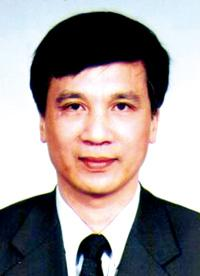

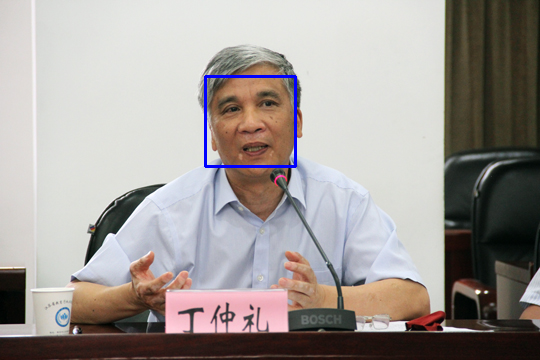

('Match', 0.5721766694951971)


In [72]:
result=Attendance(selfie,Passport)
print(result)

Adding Paasport image through file path and selfie image through web cam


In [10]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  webimg=filename
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

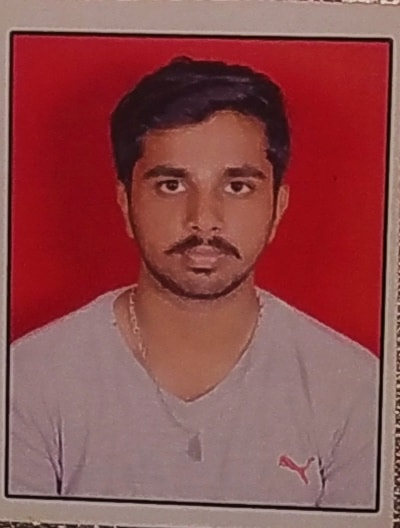

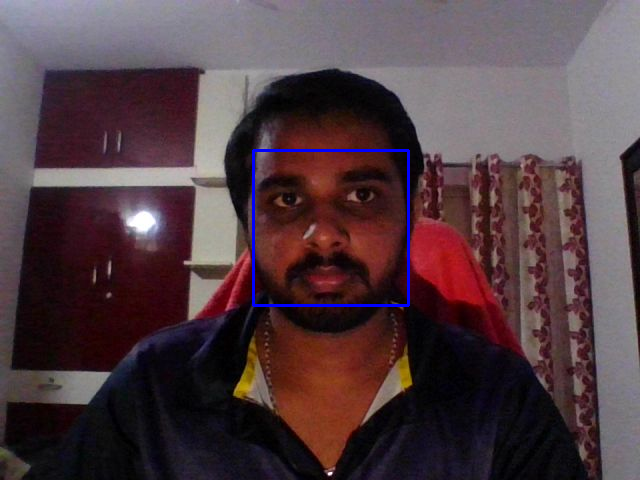

('Match', 0.5752602912799476)


In [35]:
passport=cv2.imread("/content/Q-min.jpg")
selfie=cv2.imread(webimg)

result=Attendance(selfie,Passport)
print(result)